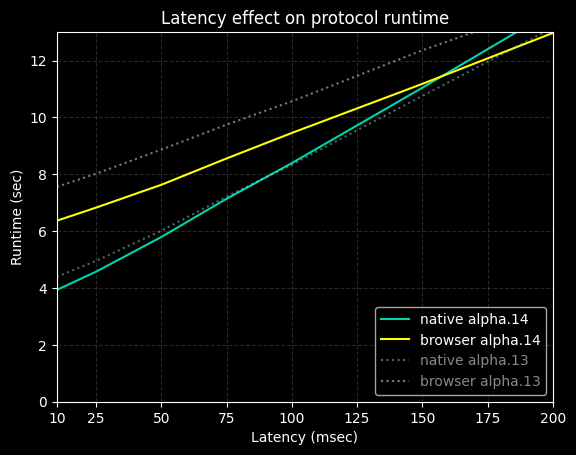

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

plt.style.use("dark_background")   # built-in dark style

# Old benchmarks (alpha.13) from old_commit/
df1_old = pd.read_csv("old_commit/native_latency.csv", header=0)
df2_old = pd.read_csv("old_commit/browser_latency.csv", header=0)

# New benchmarks (alpha.14) from harness/
df1_new = pd.read_csv("harness/native_latency_bench", header=0)
df2_new = pd.read_csv("harness/browser_latency_bench", header=0)

# Filter for latency_sweep group
df1_old = df1_old[df1_old['group'] == 'latency_sweep']
df2_old = df2_old[df2_old['group'] == 'latency_sweep']
df1_new = df1_new[df1_new['group'] == 'latency_sweep']
df2_new = df2_new[df2_new['group'] == 'latency_sweep']

agg1_old = df1_old.groupby("latency")["time_total"].mean().reset_index()
agg2_old = df2_old.groupby("latency")["time_total"].mean().reset_index()
agg1_new = df1_new.groupby("latency")["time_total"].mean().reset_index()
agg2_new = df2_new.groupby("latency")["time_total"].mean().reset_index()

# Define colors - using original benchmarks colors for faded, more saturated for solid
color_native_faded = '#8dd3c7'
color_browser_faded = '#feffb3'
color_native = '#00d4aa'  # more saturated cyan
color_browser = '#ffff00'  # more saturated yellow

# Plot alpha.14 first (for legend order), then alpha.13
plt.plot(agg1_new["latency"], agg1_new["time_total"]/1000.0, label="native alpha.14", color=color_native)
plt.plot(agg2_new["latency"], agg2_new["time_total"]/1000.0, label="browser alpha.14", color=color_browser)
plt.plot(agg1_old["latency"], agg1_old["time_total"]/1000.0, label="native alpha.13", linestyle=':', color=color_native_faded, alpha=0.5)
plt.plot(agg2_old["latency"], agg2_old["time_total"]/1000.0, label="browser alpha.13", linestyle=':', color=color_browser_faded, alpha=0.5)

plt.xlim(10, 200)
plt.ylim(0, 13)

# force ticks, otherwise 10 is not displayed
plt.xticks([10] + list(range(25, 201, 25)))

plt.xlabel("Latency (msec)")
plt.ylabel("Runtime (sec)")
plt.title("Latency effect on protocol runtime")

# Create legend and grey out alpha.13 entries
legend = plt.legend(loc="lower right")
for i, text in enumerate(legend.get_texts()):
    if "alpha.13" in text.get_text():
        text.set_color('#888888')  # grey color for alpha.13

plt.grid(True, linestyle="--", color='gray', alpha=0.3)

plt.savefig("latency.svg", bbox_inches="tight")
plt.show()
